1. Importing the Libraries

In [1]:
import pandas as pd

2. Importing the Dataset

In [2]:
data = pd.read_csv('heart.csv')

3. Taking care of missing values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

4. Taking care of Duplicate values

In [4]:
data_dup = data.duplicated().any()
data_dup

True

In [5]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

5. Data processing

In [6]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [7]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

6. encoding Categorical Data

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

7. Feature Scaling

In [11]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


8. Splitting the dataset into the Training Set And Test Set

In [14]:
X = data.drop('target',axis=1)

In [15]:
y = data['target']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,-0.710788,1,0,-0.433587,0.532247,0,0,0.718568,0,-0.468334,1,0,3
291,0.396267,1,0,-0.205463,0.241930,0,0,-0.855851,1,1.687716,1,2,3
280,-1.042904,0,1,-0.091401,-0.241930,0,0,1.112172,0,-0.382092,1,0,2
85,-1.153610,1,1,-0.661712,-0.512893,0,1,0.893503,0,-0.899544,2,0,2
239,0.839089,0,0,1.049221,-0.048386,0,1,0.193761,1,0.307844,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,0,-0.661712,-0.183867,0,1,-3.436149,0,-0.037124,1,0,2
77,0.949794,1,0,0.478910,-1.151589,0,0,-0.243577,1,2.550136,2,2,3
125,0.617678,0,3,1.049221,-0.125804,0,1,0.937237,0,-0.123366,2,0,2
522,1.392616,0,2,1.163283,0.590310,0,1,0.980971,0,-0.899544,2,1,2


In [19]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [20]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,-1.153610,1,1,-0.091401,-0.532247,0,0,1.680713,0,-0.899544,2,0,2
349,0.839089,0,2,-0.091401,0.319348,0,1,-2.299069,0,0.135360,1,1,3
135,0.396267,0,0,2.189843,-0.416120,1,0,-0.156110,1,1.515232,1,2,1
389,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
66,-0.157260,1,2,-0.091401,-0.958045,1,0,0.106294,0,0.135360,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1,1.391408,-0.029032,0,0,-0.287311,0,-0.899544,2,0,2
123,1.171205,0,2,0.478910,3.299932,1,0,0.324963,0,-0.209608,2,1,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
274,1.281911,1,0,1.619532,-0.358057,0,0,-0.505981,0,1.084022,2,0,1


In [21]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

9. Logistic Regression

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log =LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

10. SVC

In [28]:
from sklearn import svm

In [29]:
svm = svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

11. KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [38]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [39]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

12. Non-Linear ML Algorthims

In [41]:
data = pd.read_csv('heart.csv')

In [42]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(302, 14)

In [45]:
X = data.drop('target',axis=1)
y = data['target']

In [46]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

13. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred4= dt.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

14. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred5= rf.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

15. Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier()

In [59]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [60]:
y_pred6=gbc.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [62]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RT','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [63]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.737705
3,DT,0.704918
4,RT,0.852459
5,GB,0.803279


In [64]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

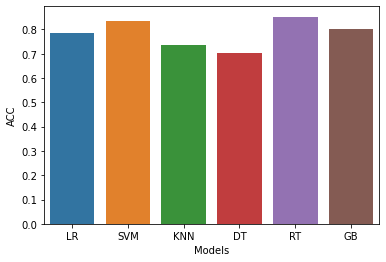

In [65]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [66]:
X = data.drop('target',axis=1)
y = data['target']

In [67]:
X.shape

(302, 13)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

16. Prediction on New Data

In [70]:
import pandas as pd

In [71]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':1,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [72]:
new_data

,age,sex,cp,trestps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,1,0,1.0,2,2,3


In [73]:
import numpy as np

In [74]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease is Present")

No Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- trestps
Feature names seen at fit time, yet now missing:
- trestbps

  warnings.warn(message, FutureWarning)


17. Save Model Using Joblib

In [75]:
import joblib

In [76]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [77]:
model = joblib.load('model_joblib_heart')

In [78]:
model.predict(new_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- trestps
Feature names seen at fit time, yet now missing:
- trestbps

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

18. GUI

In [80]:
import gradio as gr

In [81]:
def heart(Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal):
    x=np.array([Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal])
    x=np.array(x).reshape(1,-1)
    prediction = rf.predict(x)
    if prediction[0]==0:
        return "No Disease"
    else:
        return "Disease is Present"

In [82]:
app = gr.Interface(fn=heart,inputs=[gr.inputs.Number(label="Age"),
                                    gr.inputs.Number(label="Sex"),
                                    gr.inputs.Number(label="CP"),
                                    gr.inputs.Number(label="Trestps"),
                                    gr.inputs.Number(label="Chol"),
                                    gr.inputs.Number(label="FBS"),
                                    gr.inputs.Number(label="Restecg"),
                                    gr.inputs.Number(label="Thalach"),
                                    gr.inputs.Number(label="Exang"),
                                    gr.inputs.Number(label="Oldpeak"),
                                    gr.inputs.Number(label="Slope"),
                                    gr.inputs.Number(label="CA"),
                                    gr.inputs.Number(label="Thal")],
                  outputs="label",
                  title = "Disease Prediction System using Machine Learning")

C:\Users\Tejas G N\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Tejas G N\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)


In [83]:
app.launch(show_error=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
app.close()

Closing server running on port: 7860
